In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

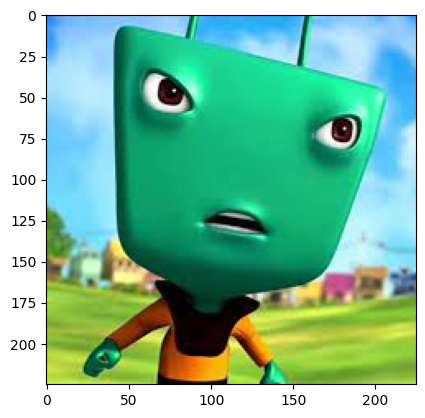

In [38]:
adudu = plt.imread("adudu.jpg")
plt.imshow(adudu)

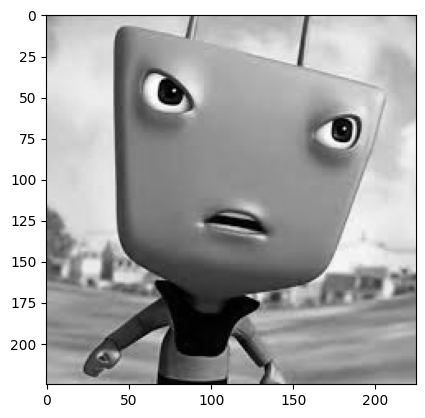

In [39]:
aduduGR = plt.imread("adudu.jpg")
aduduGR = cv.cvtColor(aduduGR, cv.COLOR_BGR2GRAY)
plt.imshow(aduduGR, cmap = 'gray')

In [40]:
kernel_3x3 = np.full((3,3), 1/9)
kernel_9x9 = np.full((9,9), 1/81)
kernel_smoothing = np.array([[1/10,1/10,1/10],
                         [1/10,1/5,1/10],
                         [1/10,1/10,1/10]])
kernel_sharpering = np.array([[1/9,1/9,1/9],
                         [1/9,8/9,1/9],
                         [1/9,1/9,1/9]])

In [41]:
def konvolusi(image, kernel):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height //2 
    pad_width = kernel_width //2
    padded_img = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode= 'edge')
    result = np.zeros([img_height, img_width])
    
    for i in range(img_height):
        for j in range(img_width):
            result [i,j] = np.sum(padded_img[i:i+kernel_height, j:j+kernel_width] * kernel)
    return result

In [ ]:
def hitung_modus(image):
    count = {}
    for num in image:
        if num in count:
            count[num] += 1
        else:
            count[num] = 1

    max_count = 0
    modus = None
    for num in count:
        if count[num] > max_count:
            max_count = count[num]
            modus = num
    return modus

In [43]:
def hitung_median(image):
    n = len(image)
    sorted_pot = sorted(image)
    if n % 2 == 0:
        median1 = sorted_pot[n//2]
        median2 = sorted_pot[n//2 - 1]
        median = (median1 + median2)/2
    else:
        median = sorted_pot[n//2]
    return median

In [ ]:
def convo_modus_median(image, kernel, jenis):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height //2
    pad_width = kernel_width //2
    padded_img =  np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='edge')
    result = np.zeros_like(image)

    for i in range(img_height):
        for j in range(img_width):
            tmp = np.zeros(len(kernel)*len(kernel))
            indeks = 0
            for k in range(kernel_height):
                for l in range(kernel_width):
                    tmp[indeks] += padded_img[i+k, j+l]
                    indeks+=1
                    if(jenis=="modus"):
                        result[i, j] = hitung_modus(tmp)
                    else:
                        result[i,j] = hitung_median(tmp)
    return result

In [45]:
kernel_3x3_kosong = np.full((3,3), 0)
kernel_9x9_kosong = np.full((9,9), 0)

In [74]:
mean3x3 = konvolusi(aduduGR, kernel_3x3)
mean9x9 = konvolusi(aduduGR, kernel_9x9)

sharpening = konvolusi(aduduGR, kernel_sharpering)
smoothing = konvolusi(aduduGR, kernel_smoothing)

modus3x3 = convo_modus_median(aduduGR, kernel_3x3_kosong, "modus")
modus9x9 = convo_modus_median(aduduGR, kernel_9x9_kosong, "modus")

median3x3 = convo_modus_median(aduduGR, kernel_3x3_kosong, "median")
median9x9 = convo_modus_median(aduduGR, kernel_9x9_kosong, "median")

Text(0.5, 1.0, 'Median 9x9')

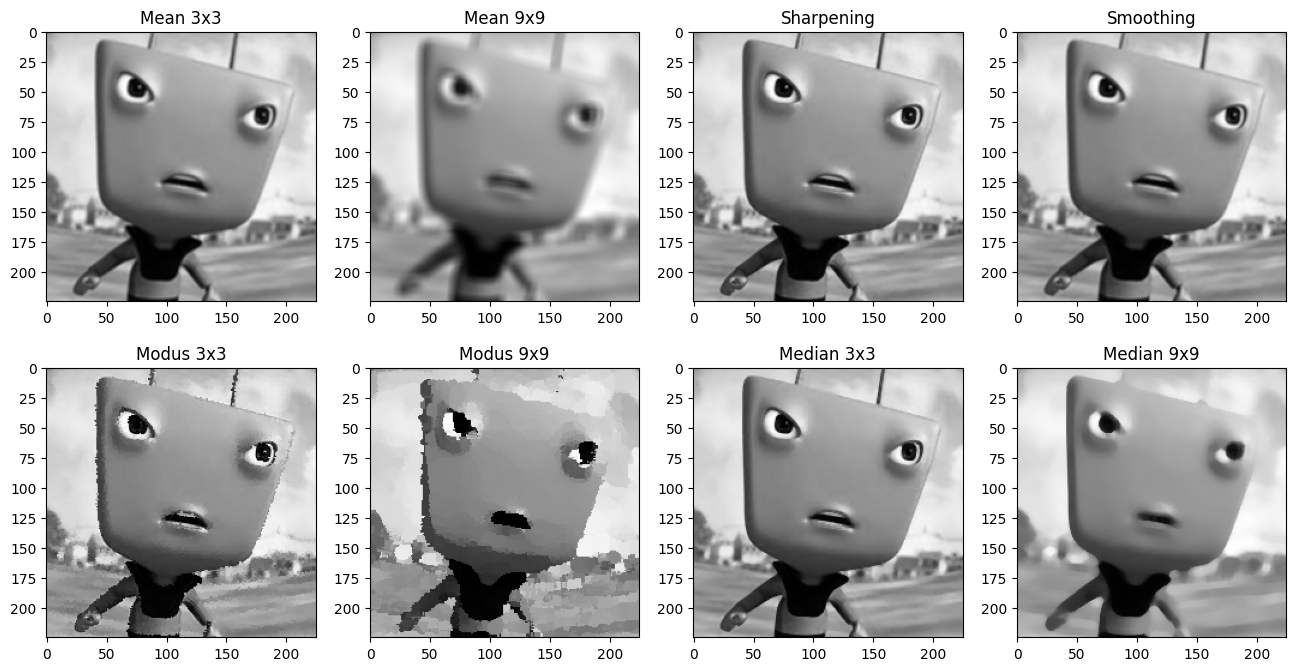

In [49]:
plt.figure(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(mean3x3, cmap='gray')
plt.title('Mean 3x3')
plt.subplot(2,4,2)
plt.imshow(mean9x9, cmap='gray')
plt.title('Mean 9x9')
plt.subplot(2,4,3)
plt.imshow(sharpening, cmap='gray')
plt.title('Sharpening')
plt.subplot(2,4,4)
plt.imshow(smoothing, cmap='gray')
plt.title('Smoothing')
plt.subplot(2,4,5)
plt.imshow(modus3x3, cmap='gray')
plt.title('Modus 3x3')
plt.subplot(2,4,6)
plt.imshow(modus9x9, cmap='gray')
plt.title('Modus 9x9')
plt.subplot(2,4,7)
plt.imshow(median3x3, cmap='gray')
plt.title('Median 3x3')
plt.subplot(2,4,8)
plt.imshow(median9x9, cmap='gray')
plt.title('Median 9x9')

In [76]:
sobelX = np.array([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]])

sobely = np.array([[1, 2, 1],
                  [0, 0, 0],
                  [-1, -2, -1]])


In [51]:
prewittX = np.array([[-1, 0, 1],
                  [-1, 0, 1],
                  [-1, 0, 1]])
prewittY = np.array([[1, 1, 1],
                  [0, 0, 0],
                  [-1, -1, -1]])

In [52]:
robertsX = np.array([[1, 0],
                     [0,-1]])
robertsY = np.array([[0, 1],
                     [-1,0]])

In [53]:
def padding_baris(image):
    height,width = image.shape
    padding = np.zeros((height,width +1))
    for i in range (height):
        for j in range (width):
            padding[i][j] = image[i][j]
    return padding

In [54]:
def padding_kolom(image):
    height,width = image.shape
    padding = np.zeros((height+1 ,width))
    for i in range (height):
        for j in range (width):
            padding[i][j] = image[i][j]
    return padding

In [77]:
def konvolusi_tepi(image, kernel, jenis):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height //2
    pad_width = kernel_width //2
    if(jenis!="roberts"):
        padded_img =  np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    else:
        padded_baris = padding_baris(image)
        padded_img = padding_kolom(padded_baris)
    result = np.zeros([img_height, img_width])

    for i in range(img_height):
        for j in range(img_width):
            result[i, j] = np.sum(padded_img[i:i+kernel_height, j:j+kernel_width] * kernel)
    return result

In [78]:
def deteksi_tepi(image, kernelX, kernelY, jenis):
    hasilX = konvolusi_tepi(image, kernelX, jenis)
    hasilY = konvolusi_tepi(image, kernelY, jenis)

    M = np.sqrt((hasilX*hasilX)+(hasilY*hasilY))

    return M

In [61]:
roberts_mean_3x3 = deteksi_tepi(mean3x3, robertsX, robertsY, "roberts")
roberts_mean_9x9 = deteksi_tepi(mean9x9, robertsX, robertsY, "roberts")
roberts_sharpening = deteksi_tepi(sharpening, robertsX, robertsY, "roberts")
roberts_smoothing = deteksi_tepi(smoothing, robertsX,robertsY, "roberts")
roberts_modus_3x3 = deteksi_tepi(modus3x3, robertsX, robertsY, "roberts")
roberts_modus_9x9 = deteksi_tepi(modus9x9, robertsX, robertsY, "roberts")
roberts_median_3x3 = deteksi_tepi(median3x3, robertsX, robertsY, "roberts")
roberts_median_9x9 = deteksi_tepi(median9x9, robertsX, robertsY, "roberts")


Text(0.5, 1.0, 'Roberts Median 9x9')

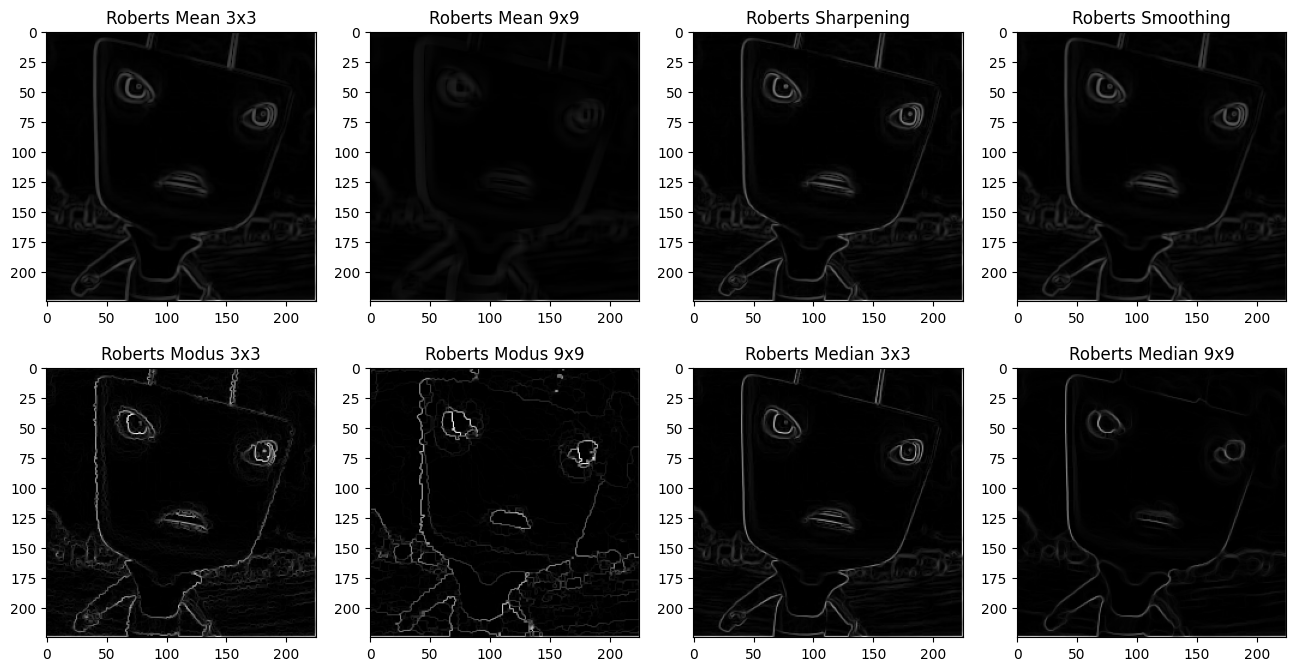

In [62]:
plt.figure(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(roberts_mean_3x3, cmap='gray')
plt.title('Roberts Mean 3x3')
plt.subplot(2,4,2)
plt.imshow(roberts_mean_9x9, cmap='gray')
plt.title('Roberts Mean 9x9')
plt.subplot(2,4,3)
plt.imshow(roberts_sharpening, cmap='gray')
plt.title('Roberts Sharpening')
plt.subplot(2,4,4)
plt.imshow(roberts_smoothing, cmap='gray')
plt.title('Roberts Smoothing')
plt.subplot(2,4,5)
plt.imshow(roberts_modus_3x3, cmap='gray')
plt.title('Roberts Modus 3x3')
plt.subplot(2,4,6)
plt.imshow(roberts_modus_9x9, cmap='gray')
plt.title('Roberts Modus 9x9')
plt.subplot(2,4,7)
plt.imshow(roberts_median_3x3, cmap='gray')
plt.title('Roberts Median 3x3')
plt.subplot(2,4,8)
plt.imshow(roberts_median_9x9, cmap='gray')
plt.title('Roberts Median 9x9')

In [ ]:
sobel_mean_3x3 = deteksi_tepi(mean3x3, sobelX, sobelY, "sobel")
sobel_mean_9x9 = deteksi_tepi(mean9x9, sobelX, sobelY, "sobel")
sobel_sharpening = deteksi_tepi(sharpening, sobelX, sobelY, "sobel")
sobel_smoothing = deteksi_tepi(smoothing, sobelX,sobelY, "sobel")
sobel_modus_3x3 = deteksi_tepi(modus3x3, sobelX, sobelY, "sobel")
sobel_modus_9x9 = deteksi_tepi(modus9x9, sobelX, sobelY, "sobel")
sobel_median_3x3 = deteksi_tepi(median3x3, sobelX, sobelY, "sobel")
sobel_median_9x9 = deteksi_tepi(median9x9, sobelX, sobelY, "sobel")

Text(0.5, 1.0, 'Sobel Median 9x9')

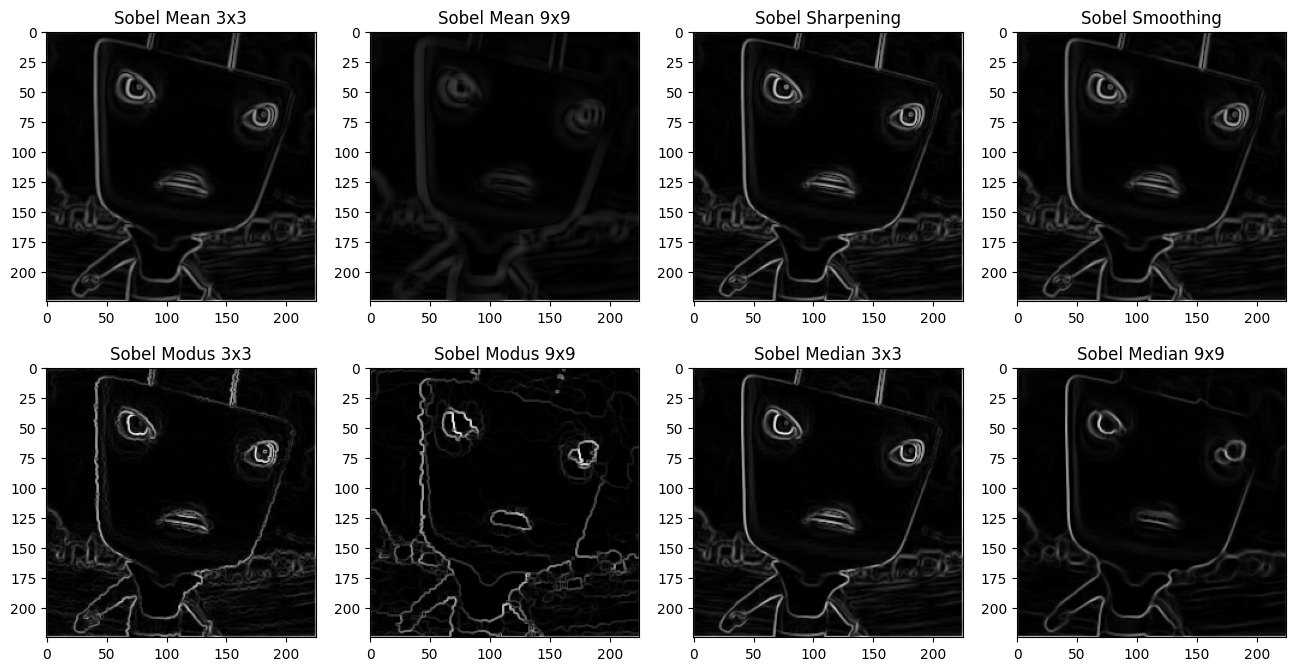

In [71]:
plt.figure(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(sobel_mean_3x3, cmap='gray')
plt.title('Sobel Mean 3x3')
plt.subplot(2,4,2)
plt.imshow(sobel_mean_9x9, cmap='gray')
plt.title('Sobel Mean 9x9')
plt.subplot(2,4,3)
plt.imshow(sobel_sharpening, cmap='gray')
plt.title('Sobel Sharpening')
plt.subplot(2,4,4)
plt.imshow(sobel_smoothing, cmap='gray')
plt.title('Sobel Smoothing')
plt.subplot(2,4,5)
plt.imshow(sobel_modus_3x3, cmap='gray')
plt.title('Sobel Modus 3x3')
plt.subplot(2,4,6)
plt.imshow(sobel_modus_9x9, cmap='gray')
plt.title('Sobel Modus 9x9')
plt.subplot(2,4,7)
plt.imshow(sobel_median_3x3, cmap='gray')
plt.title('Sobel Median 3x3')
plt.subplot(2,4,8)
plt.imshow(sobel_median_9x9, cmap='gray')
plt.title('Sobel Median 9x9')

In [72]:
prewitt_mean_3x3 = deteksi_tepi(mean3x3, prewittX, prewittY, "prewitt")
prewitt_mean_9x9 = deteksi_tepi(mean9x9, prewittX, prewittY, "prewitt")
prewitt_sharpening = deteksi_tepi(sharpening, prewittX, prewittY, "prewitt")
prewitt_smoothing = deteksi_tepi(smoothing, prewittX,prewittY, "prewitt")
prewitt_modus_3x3 = deteksi_tepi(modus3x3, prewittX, prewittY, "prewitt")
prewitt_modus_9x9 = deteksi_tepi(modus9x9, prewittX, prewittY, "prewitt")
prewitt_median_3x3 = deteksi_tepi(median3x3, prewittX, prewittY, "prewitt")
prewitt_median_9x9 = deteksi_tepi(median9x9, prewittX, prewittY, "prewitt")

Text(0.5, 1.0, 'Prewitt Median 9x9')

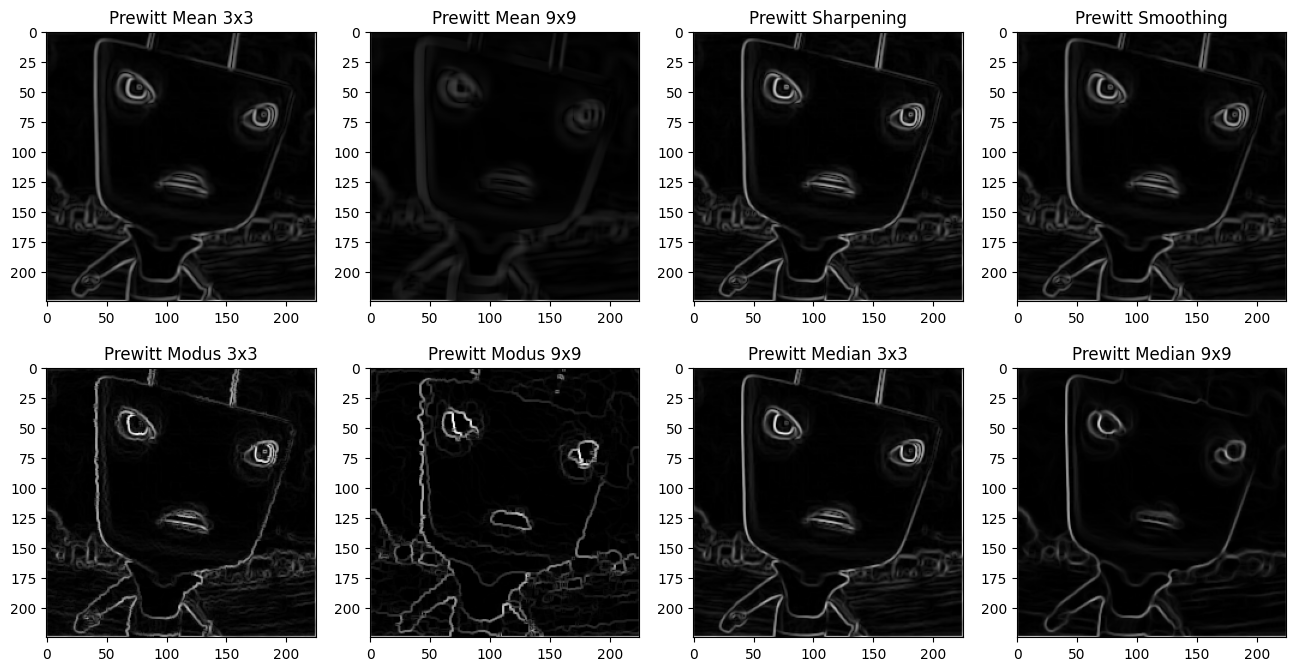

In [73]:
plt.figure(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(prewitt_mean_3x3, cmap='gray')
plt.title('Prewitt Mean 3x3')
plt.subplot(2,4,2)
plt.imshow(prewitt_mean_9x9, cmap='gray')
plt.title('Prewitt Mean 9x9')
plt.subplot(2,4,3)
plt.imshow(prewitt_sharpening, cmap='gray')
plt.title('Prewitt Sharpening')
plt.subplot(2,4,4)
plt.imshow(prewitt_smoothing, cmap='gray')
plt.title('Prewitt Smoothing')
plt.subplot(2,4,5)
plt.imshow(prewitt_modus_3x3, cmap='gray')
plt.title('Prewitt Modus 3x3')
plt.subplot(2,4,6)
plt.imshow(prewitt_modus_9x9, cmap='gray')
plt.title('Prewitt Modus 9x9')
plt.subplot(2,4,7)
plt.imshow(prewitt_median_3x3, cmap='gray')
plt.title('Prewitt Median 3x3')
plt.subplot(2,4,8)
plt.imshow(prewitt_median_9x9, cmap='gray')
plt.title('Prewitt Median 9x9')

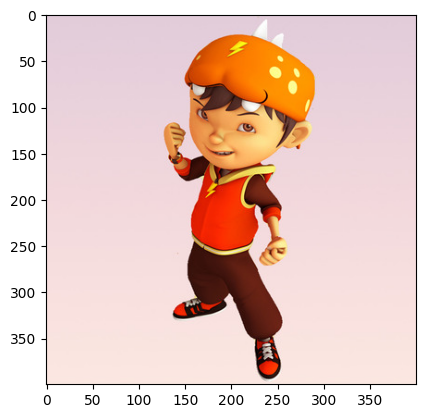

In [79]:
boboiboy = plt.imread("boboiboy.jpg")
plt.imshow(boboiboy)

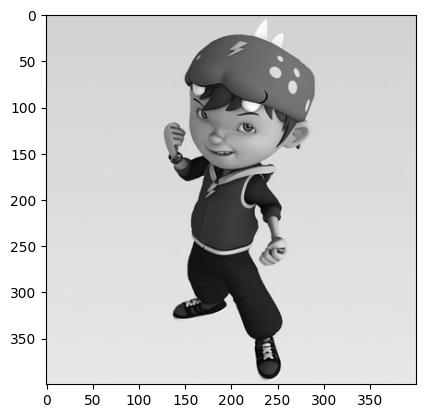

In [81]:
boboiboyGR = plt.imread("boboiboy.jpg")
boboiboyGR = cv.cvtColor(boboiboyGR, cv.COLOR_BGR2GRAY)
plt.imshow(boboiboyGR, cmap = 'gray')

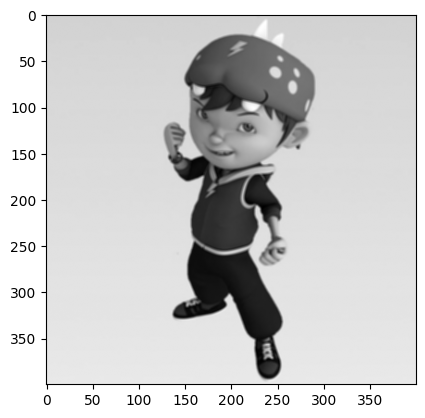

In [83]:
boboiboy_mean_3x3 = konvolusi(boboiboyGR, kernel_3x3)
plt.imshow(boboiboy_mean_3x3, cmap = 'gray')

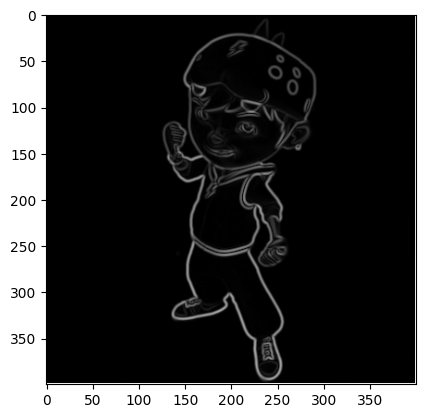

In [84]:
boboiboy_prewitt = deteksi_tepi(boboiboy_mean_3x3, prewittX, prewittY, "prewitt")
plt.imshow(boboiboy_prewitt, cmap = 'gray')